In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## This method was an intial try by at gridding by normlising the cooridnates

In [37]:
survey = pd.read_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_C_MERGE_CORRECTED.csv')
survey.head()

,Unnamed: 0,Y,X,Depth,Selection
0,0,50.759664,-1.187467,18.288,0.0
1,1,50.759673,-1.187468,18.211,0.0
2,2,50.759681,-1.187468,18.139,0.0
3,3,50.759687,-1.187465,18.137,0.0
4,4,50.759691,-1.187465,18.177,0.0


In [ ]:
#min Y 50.7593714 X -1.1880778
#max X 50.7753011 X -1.1597271

In [38]:
X = survey['X'].tolist()
Y = survey['Y'].tolist()
Z = survey['Depth'].tolist()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


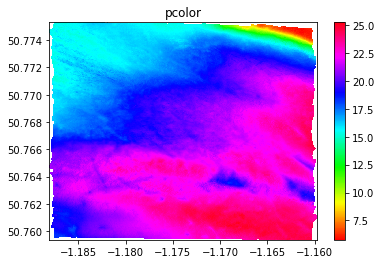

In [44]:
zi, yi, xi = np.histogram2d(Y, X, bins=(1000,1000), weights=Z, normed=False)
counts, _, _ = np.histogram2d(Y, X, bins=(1000,1000))

zi = zi / counts
zi = np.ma.masked_invalid(zi)

#plot it
# fig, ax = plt.subplots()
# ax.pcolormesh(xi, yi, zi)
# fig.colorbar()
# ax.margins(0.05)

plt.pcolor(xi, yi, zi, cmap='hsv', vmin=zi.min(), vmax=zi.max())
plt.title('pcolor')

plt.axis([xi.min(), xi.max(), yi.min(), yi.max()])
plt.colorbar()

plt.show()

# New Method

In [18]:
surveyTG = pd.read_csv('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//HI1509_MERGE_CORRECTED.csv')
surveyTG.head()

,Unnamed: 0,X,Y,Depth,Selection
0,0,-5.162075,55.006263,0.9,0.0
1,1,-5.162076,55.006281,-0.6,0.0
2,2,-5.162045,55.006281,-0.5,0.0
3,3,-5.162077,55.006299,-0.5,0.0
4,4,-5.162046,55.006299,-0.7,0.0


In [22]:
minx = surveyTG['X'].min()
maxx = surveyTG['X'].max()
rangex = maxx-minx
surveyTG['GridX'] = (survey['X'] - minx)/rangex

miny = surveyTG['Y'].min()
maxy = surveyTG['Y'].max()
rangey = maxy-miny
surveyTG['GridY'] = (survey['Y'] - miny)/rangey

In [21]:
print (minx)
print (maxx) 
print (miny) 
print (maxy) 

-5.1620833
-5.05855559
55.00626292
55.03657557


In [25]:
#want 1000*1000 so rounding to 3dp
survey2 = surveyTG.round({'GridX': 3, 'GridY': 3})
survey2.head()

,Unnamed: 0,X,Y,Depth,Selection,GridX,GridY
0,0,-5.162075,55.006263,0.9,0.0,0.0,0.000
1,1,-5.162076,55.006281,-0.6,0.0,0.0,0.001
2,2,-5.162045,55.006281,-0.5,0.0,0.0,0.001
3,3,-5.162077,55.006299,-0.5,0.0,0.0,0.001
4,4,-5.162046,55.006299,-0.7,0.0,0.0,0.001


In [28]:
#create groupby tables grouping by the gridX and gridY to find the mean, min, max for each grid square, combine these for 'result' the grid file 

surveyMean = survey2.groupby(['GridX', 'GridY'])['Depth'].mean().reset_index()
surveyMean.columns = ['GridX','GridY','MeanDepth']

surveyMin = survey2.groupby(['GridX', 'GridY'])['Depth'].min().reset_index()
surveyMin.columns =['GridX','GridY','MinDepth']

surveyMax = survey2.groupby(['GridX', 'GridY'])['Depth'].max().reset_index()
surveyMax.columns =['GridX','GridY','MaxDepth']

surveySS = survey2.groupby(['GridX', 'GridY'])['Selection'].max().reset_index()

result = pd.merge(surveyMean, surveyMax, how='left', on=['GridX', 'GridY'])
result = result.merge(surveyMin, how='left', on=['GridX', 'GridY'])
result = result.merge(surveySS, how='left', on=['GridX', 'GridY'])

result.head()


,GridX,GridY,MeanDepth,MaxDepth,MinDepth,Selection
0,0.0,0.000,0.900,0.9,0.9,0.0
1,0.0,0.001,-0.575,-0.5,-0.7,0.0
2,0.0,0.002,0.525,1.3,0.0,0.0
3,0.0,0.003,1.200,1.5,0.9,0.0
4,0.0,0.004,3.300,5.4,1.3,0.0


In [30]:
result.to_csv('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//HI1509_MERGE_GRIDDED.csv')

In [3]:
result = pd.read_csv('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//HI1509_MERGE_GRIDDED.csv')
